# Recurrent Neural Networks LSTM

## 2D Tensor Sequence Linear


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD

In [2]:
series = np.sin((0.1*np.arange(400))**2)

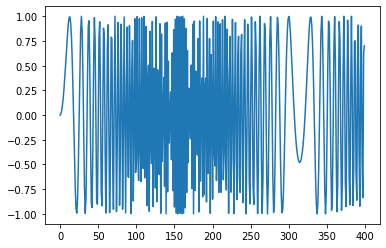

In [3]:
plt.plot(series)

In [4]:
T = 10
D = 1
X = []
Y = []
for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print(X.shape, Y.shape, N)

(390, 10) (390,) 390


In [5]:
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(
    loss = 'mse',
    optimizer = Adam(lr=0.01),    
)
r = model.fit(
    X[:-N//2], Y[:-N//2], 
    epochs = 80,
    validation_data=(X[-N//2:], Y[-N//2:]),
    )

Epoch 1/80
7/7 [==============================] - 0s 21ms/step - loss: 1.3526 - val_loss: 1.4709
Epoch 2/80
7/7 [==============================] - 0s 5ms/step - loss: 1.1355 - val_loss: 1.3329
Epoch 3/80
7/7 [==============================] - 0s 5ms/step - loss: 0.9709 - val_loss: 1.2079
Epoch 4/80
7/7 [==============================] - 0s 5ms/step - loss: 0.8507 - val_loss: 1.1019
Epoch 5/80
7/7 [==============================] - 0s 5ms/step - loss: 0.7710 - val_loss: 1.0212
Epoch 6/80
7/7 [==============================] - 0s 5ms/step - loss: 0.7091 - val_loss: 0.9600
Epoch 7/80
7/7 [==============================] - 0s 6ms/step - loss: 0.6638 - val_loss: 0.9106
Epoch 8/80
7/7 [==============================] - 0s 5ms/step - loss: 0.6302 - val_loss: 0.8484
Epoch 9/80
7/7 [==============================] - 0s 6ms/step - loss: 0.6031 - val_loss: 0.7940
Epoch 10/80
7/7 [==============================] - 0s 5ms/step - loss: 0.5745 - val_loss: 0.7549
Epoch 11/80
7/7 [=====================

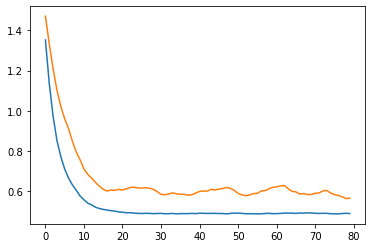

In [6]:
plt.plot(r.history['loss'], label ='Loss')
plt.plot(r.history['val_loss'], label ='Validation Loss')
plt.show()

(390, 1)


[]

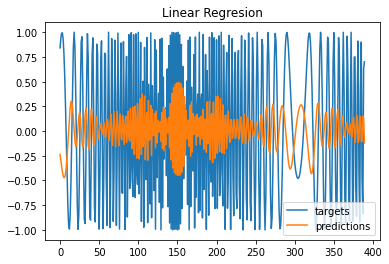

In [7]:
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]
plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title('Linear Regresion')
plt.legend()
plt.plot()

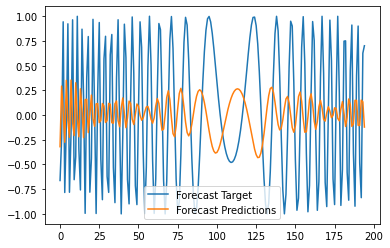

In [8]:
validation_target = Y[-N//2:]
validation_predictions =[]
i = -N//2
while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1))[0,0]
  i += 1
  validation_predictions.append(p)

plt.plot(validation_target, label = 'Forecast Target')
plt.plot(validation_predictions, label = 'Forecast Predictions')
plt.legend()

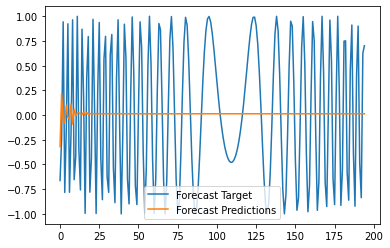

In [9]:
validation_target = Y[-N//2:]
validation_predictions= []
last_x = X[-N//2]
while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1,-1))[0,0]
  validation_predictions.append(p)
  last_x = np.roll(last_x, -1)
  last_x[-1] = p
  
plt.plot(validation_target, label = 'Forecast Target')
plt.plot(validation_predictions, label = 'Forecast Predictions')
plt.legend()

In [10]:
X = X.reshape(-1, T, 1)

i = Input(shape=(T, D))
x = LSTM(10)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(lr = 0.05),
)
r = model.fit(
    X[:-N//2], Y[:-N//2],
    batch_size = 32,
    epochs = 200,
    validation_data=(X[-N//2:], Y[-N//2:]),)

Epoch 1/200
7/7 [==============================] - 0s 53ms/step - loss: 0.5468 - val_loss: 0.5290
Epoch 2/200
7/7 [==============================] - 0s 8ms/step - loss: 0.4941 - val_loss: 0.6020
Epoch 3/200
7/7 [==============================] - 0s 9ms/step - loss: 0.4732 - val_loss: 0.5018
Epoch 4/200
7/7 [==============================] - 0s 8ms/step - loss: 0.3827 - val_loss: 0.5023
Epoch 5/200
7/7 [==============================] - 0s 9ms/step - loss: 0.2745 - val_loss: 0.4691
Epoch 6/200
7/7 [==============================] - 0s 10ms/step - loss: 0.2032 - val_loss: 0.3494
Epoch 7/200
7/7 [==============================] - 0s 9ms/step - loss: 0.1937 - val_loss: 0.2480
Epoch 8/200
7/7 [==============================] - 0s 9ms/step - loss: 0.2237 - val_loss: 0.3096
Epoch 9/200
7/7 [==============================] - 0s 8ms/step - loss: 0.1652 - val_loss: 0.3592
Epoch 10/200
7/7 [==============================] - 0s 8ms/step - loss: 0.1146 - val_loss: 0.1750
Epoch 11/200
7/7 [=========

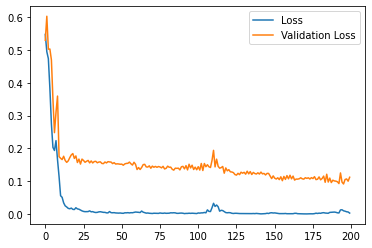

In [11]:
plt.plot(r.history['loss'], label ='Loss')
plt.plot(r.history['val_loss'], label ='Validation Loss')
plt.legend()

(390, 1)


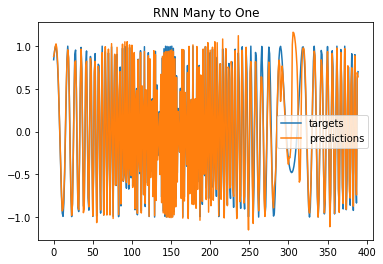

In [12]:
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:, 0]
plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title('RNN Many to One')
plt.legend()

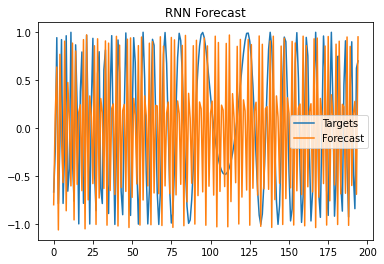

In [13]:
forecast = []
input_ = X[-N//2]
while len(forecast) < len(Y[-N//2:]):
  f = model.predict(input_.reshape(1, T, 1))[0,0]
  forecast.append(f)
  input_ = np.roll(input_, -1)
  input_[-1] = f

plt.plot(Y[-N//2:], label = 'Targets')
plt.plot(forecast, label = 'Forecast')
plt.title('RNN Forecast')
plt.legend()

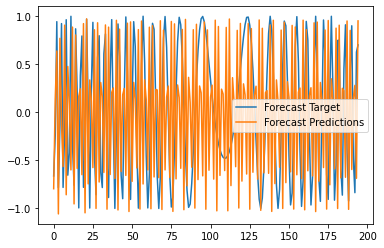

In [14]:
validation_target = Y[-N//2:]
validation_predictions= []
last_x = X[-N//2]
while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1,-1, 1))[0,0]
  validation_predictions.append(p)
  last_x = np.roll(last_x, -1)
  last_x[-1] = p
  
plt.plot(validation_target, label = 'Forecast Target')
plt.plot(validation_predictions, label = 'Forecast Predictions')
plt.legend()